# AI-guided Discovery of a Barrier-Protective Therapy in Inflammatory Bowel Disease

Authors: Debashis Sahoo1-3†*, Lee Swanson4†, Ibrahim M. Sayed5†$, Gajanan D. Katkar4, Stella-Rita Ibeawuchi5, Yash Mittal6, Rama F. Pranadinata4, Courtney Tindle4, Mackenzie Fuller4, Dominik L. Stec4, John T. Chang6, William J. Sandborn6, Soumita Das5* and Pradipta Ghosh3, 4, 6, 7*


In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

## Counting Samples

In [7]:
import bone
reload(bone)
ana = bone.IBDAnalysis()
ana.getArijs2018Df()
atype = ana.getSurvName("c Title")
atype = [re.sub("_.*", "", str(k)) for k in atype]
len(hu.uniq(atype))
rtype = ana.getSurvName("c induction therapy_maintenance therapy")
rtypes = ['CO', 'PLAC', 'VDZ', 'IFX']
ahash = {'plac_plac':1, 'vdz_vdz4w':2, 'vdz_plac':2, 'vdz_vdz8w':2,
        'vdz4w':2}
for i in range(len(rtypes)):
    ahash[rtypes[i]] = i
rval = [ahash[i] if i in ahash else None for i in rtype]
print(Counter(rval))
ana.getWu2007Df()

Arijs 2018 UC (n = 178)
GSE73661 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP10
178 [12, 30, 52, 67, 17] GSE73661 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP10 PLP10
Counter({2: 113, 3: 46, 0: 12, 1: 7, None: 2})
Wu 2007 IBD (n = 36)
GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12
16 [4, 5, 7] GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12 PLP12


## Figure 2D and S1G: 

In [9]:
import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 2, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]


[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Peters 2017 IBD (n = 134)
GSE83687 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP7
134 [60, 32, 42] GSE83687 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP7 PLP7
[111, 394, 779]
40.458937198070686 36.24661246612528


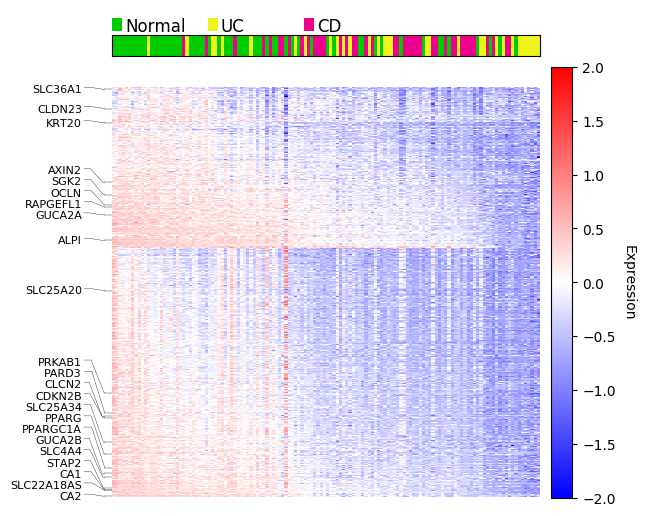

In [172]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)
ana = bone.IBDAnalysis()
ana.getPetersDf()
ana.orderDataDf(l1, wt1)
ofile = "results/heatmap-test.pdf"
params = {'dx': 100, 'dy': 10, 'spaceAnn': 30, 'tAnn': 1, 'widthAnn':3,
          'sy': 35, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes, 'atypes': ana.atypes,'cval': ana.cval,
          'tl': 6, 'tw': 0.25, 'ts': 10, 'tsi': -100}
i1 = ana.i1
f_ranks = ana.f_ranks
ana.params = {'genes': genes,'atypes': ana.atypes,'cval': ana.cval}
ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

## Figure 2E

In [173]:
import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
ana = bone.IBDAnalysis()
ana.getWu2007Df(2)

opts = [ [[1, 2, 3], [-3, -2, -1]],
        [[2, 3, 4], [-2, -1, 1]],
        [[3, 4, 6], [-1, 1, 2]],
        [[3, 5, 6], [-1, 1, 2]],
        [[4, 5, 6], [1, 1, 1]],
        [[1, 3, 4], [-2, -1, 1]],
        [[1, 3, 5], [-2, -1, 1]],
        [[2, 3, 5], [-2, -1, 1]],
        [[1, 2, 3, 4], [-3, -2, -1, 1]],
        [[1, 2, 3, 5], [-3, -2, -1, 1]],
        [[1, 2, 3, 5, 6], [-3, -2, -1, 1, 2]],
        [[1, 2, 3, 4, 5, 6], [-3, -2, -1, 1, 2, 3]]]

res = []
for i in range(len(opts)):
    print (i, opts[i])
    genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in opts[i][0]], opts[i][1], 0)
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(opts)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)

bone.printOLS('y ~ c0 + c1', df1)

Wu 2007 IBD (n = 36)
GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12
16 [4, 12] GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12 PLP12
0 [[1, 2, 3], [-3, -2, -1]]
[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
[84, 270, 519]
ROC-AUC 1.00
[774.7764207326995, 6.496217843939148, 774.2764207326995, 775.2764207326995]
44.538771252172275 774.7764207326995
1 [[2, 3, 4], [-2, -1, 1]]
[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[394, 779, 1243]
[-2, -1, 1]
[270, 519, 1128]
ROC-AUC 0.90
[100.80899444110366, 13.082529563044076, 100.30899444110366, 101.30899444110366]
60.442881752664064 100.80899444110366
2 [[3, 4, 6], [-1, 1, 2]]
[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[779, 1243, 977]
[-1, 1, 2]
[519, 1128, 890]
ROC-AUC 0.69
[-1345.0333346660082, 10.006439207472033, -1345.5333346660082, -134

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
Intercept,Intercept,4.285714e-01,0.132055,0.725088,0.008089,**
c0,c0,5.714286e-01,0.112067,1.030790,0.018636,*
c1,c1,8.326673e-17,-0.526264,0.526264,1.000000,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     3.909
Date:                Thu, 21 May 2020   Prob (F-statistic):             0.0369
Time:                        11:45:01   Log-Likelihood:                -3.8575
No. Observations:                  16   AIC:                             15.71
Df Residuals:                      12   BIC:                             18.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3793      0.140      2.708      0.0

Text(0.5, 1.0, 'GSE6731 (N = 4, IBD = 12)')

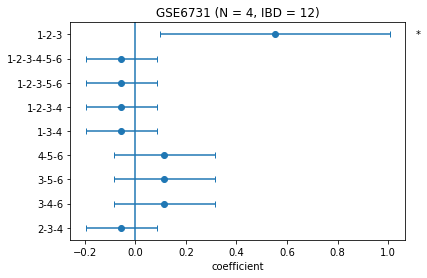

In [174]:
df2 = bone.printOLS('y ~ c1 + c2 + c3 + c4 + c5 + c8 + c10 + c11 + c0', df1)
df = df2
df = df.drop(['Intercept'])
df["Name"] = ['2-3-4', '3-4-6', '3-5-6', '4-5-6', '1-3-4', '1-2-3-4',
               '1-2-3-5-6', '1-2-3-4-5-6', '1-2-3']
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
ax.set_title("GSE6731 (N = 4, IBD = 12)")

## Figure 2F:

Verstockt 2019 IBD (n = 43)
E-MTAB-7604 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP73
11 [4, 7] E-MTAB-7604 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP73 PLP73
[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
[111, 392, 777]
[0 0 0 1 1 1 1 0 1 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
['0.86', '0.91', '0.0242']
[171, 162]
[1 0 0 1 0 1 1 1 0 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
['0.68', '0.73', '0.491']
[133]
[1 0 0 1 0 1 1 1 1 1 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['0.61', '0.64', '1']


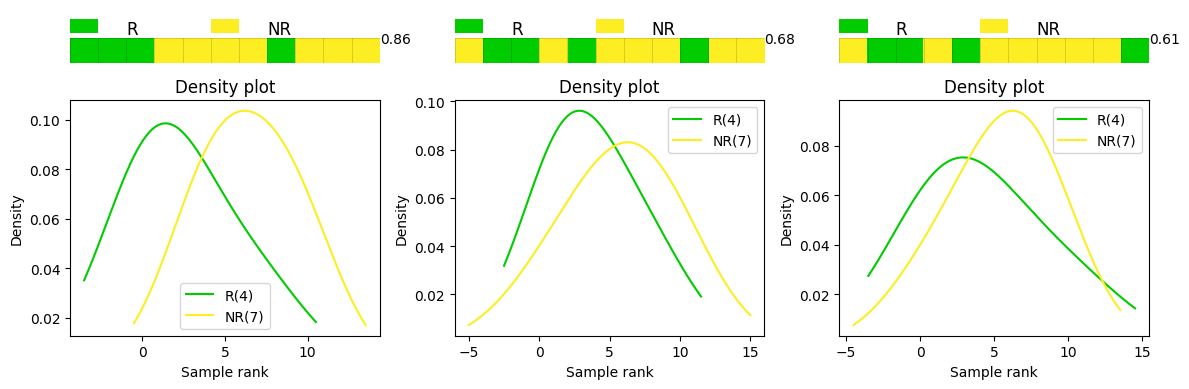

In [191]:
import bone
reload(bone)
fig = plt.figure(figsize=(12,4), dpi=100)
n1 = 3
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((4, n1), (0, i))
    axlist.extend([ax])
    ax = plt.subplot2grid((4, n1), (1, i), rowspan=3)
    axlist.extend([ax])

acolor = ["#00CC00", "#FCEE23","#EC008C",
          'cyan', "#F7941D", "#808285",
          'blue', 'black', 'green', 'red']

ana = bone.IBDAnalysis()
ana.getVerstockt2019Df(2)

ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)

ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 5, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[0]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)
res = ana.getMetrics2(ana.cval[0])
print(res)
ana.densityPlot(axlist[1], acolor)

l1 = [bone.readList("data/dea-list-3.txt"), bone.readList("data/dea-list-4.txt")]
wt1 = [-1, 1]
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 5, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[2]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)
res = ana.getMetrics2(ana.cval[0])
print(res)
ana.densityPlot(axlist[3], acolor)

l1 = [bone.readList("data/peters-kdg.txt")]
wt1 = [1]
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 5, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[4]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)
res = ana.getMetrics2(ana.cval[0])
print(res)
ana.densityPlot(axlist[5], acolor)
plt.tight_layout()

## Figure 2G:

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Vanhove 2015 IBD (n = 116)
GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23
105 [23, 82] GSE59071 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP23 PLP23
[117, 414, 808]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Van der Goten 2014 IBD (n = 21)
GSE48958 http:

Text(15, 4, '0.93,0.93,0.00879')

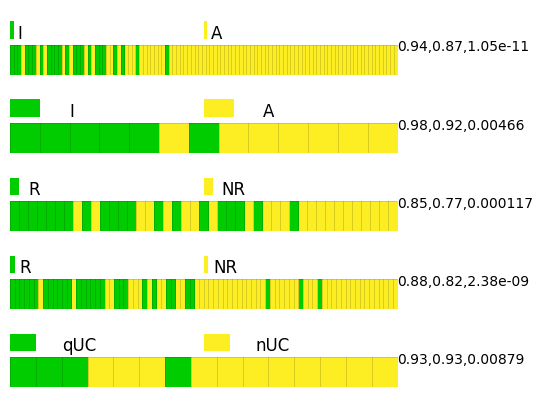

In [29]:
import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)

fig = plt.figure(figsize=(5,5), dpi=100)
n1 = 5
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

acolor = ["#00CC00", "#FCEE23","#EC008C",
          'cyan', "#F7941D", "#808285",
          'blue', 'black', 'green', 'red']
ana = bone.IBDAnalysis()

ana.getVanhoveDf(3)
ana.orderDataDf(l1, wt1)
predicted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
             0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
params = {'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'predicted': predicted,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[0]}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))

ana.getVanderGotenDf(3)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[1]}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))

ana.getArijs2009Df(3)
ana.orderDataDf(l1, wt1)
predicted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
             0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
params = {'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'predicted': predicted,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[2]}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))

ana.getArijs2018Df(3)
ana.orderDataDf(l1, wt1)
predicted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
params = {'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'predicted': predicted,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[3]}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))

ana.getPekowDf(3)
ana.orderDataDf(l1, wt1)
predicted = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
params = {'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'predicted': predicted,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[4]}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))

## Figure 4B

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Breynaert 2013 dss (n = 30)
GSE42768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP38
30 [5, 25] GSE42768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP38 PLP38
[122, 417, 809]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Jensen 2017 DSS (n = 6)
E-MTAB-5249 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP66
6 [3, 3] E-MTAB-5249 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP66 PLP66
[112, 393, 763]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 1]
Dohi 2014 Mm TNBS (n = 72)
GSE53835 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP94
72 [8, 64] GSE53835 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP94 PLP94
[270, 729, 1421]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1

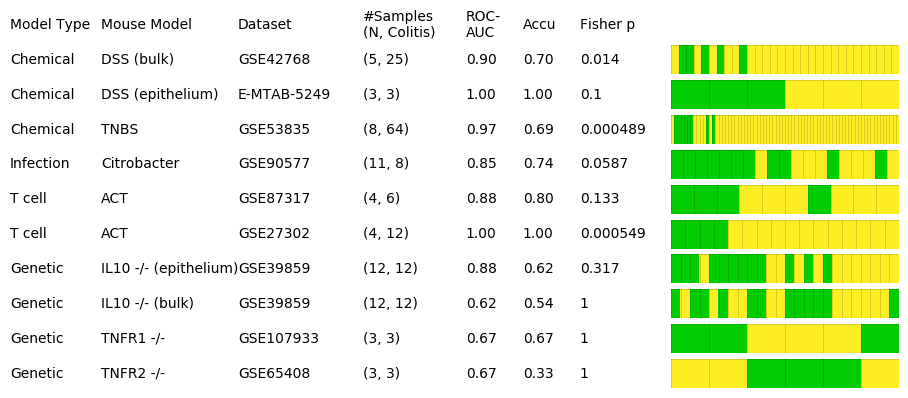

In [40]:
def printMouse(l1, wt1):
    data = { "roc-auc": [], "accuracy": [], "fisher": [], "mtype": [], "model": [],
            "source": [], "title": [], "dbid": [], "key": [], "bar": None}
    genes = []

    fig = plt.figure(figsize=(10,5), dpi=100)
    n1 = 11
    axlist = []
    for i in range(n1):
        ax = plt.subplot2grid((n1, 3), (i, 2))
        axlist.extend([ax])

    def processHeader(ax):
        nAt = 10
        extent = [0, nAt, 0, 5]
        ax.axis(extent)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(top=False, left=False, bottom=False, right=False)
        for edge, spine in ax.spines.items():
                    spine.set_visible(False)
        ax.text(-2.9, 0.5, "Model Type",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-2.5, 0.5, "Mouse Model",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-1.9, 0.5, "Dataset",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-1.35, 0.5, "#Samples\n(N, Colitis)",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.9, 0.5, "ROC-\nAUC",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.65, 0.5, "Accu",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.4, 0.5, "Fisher p",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)

    def processMm(ana, genes, wt1, l1, ax, desc1, desc2,
        acolor = acolor, data = data, fthr = "thr0"):
        ana.convertMm(l1, genes)
        ana.orderDataDf(ana.gene_groups, wt1)
        nAt = len(ana.cval[0])
        extent = [0, nAt, 0, 5]
        ax.axis(extent)
        cmap = colors.ListedColormap(acolor)
        boundaries = range(len(acolor) + 1)
        norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
        ax.imshow(ana.cval, interpolation='nearest', cmap=cmap, \
                          norm=norm, extent=extent, aspect="auto")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(top=False, left=False, bottom=False, right=False)
        ax.set_xticks(np.arange(0, nAt, 1))
        ax.grid(which='major', alpha=0.2, linestyle='-', linewidth=0.5,
                color='black')
        for edge, spine in ax.spines.items():
                    spine.set_visible(False)
        res = ana.getMetrics2(ana.cval[0], fthr=fthr)
        ax.text(-2.9, 0.5, desc1,
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-2.5, 0.5, desc2,
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-1.9, 0.5, ana.source,
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-1.35, 0.5, "(" + str(len(ana.state[0])) + ", " + str(len(ana.state[1])) + ")",
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.9, 0.5, res[0],
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.65, 0.5, res[1],
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        ax.text(-0.4, 0.5, res[2],
                horizontalalignment='left', verticalalignment='center',
                transform=ax.transAxes)
        data["roc-auc"] += [res[0]]
        data["accuracy"] += [res[1]]
        data["fisher"] += [res[2]]
        data["source"] += [ana.source]
        data["title"] += [ana.name]
        data["dbid"] += [ana.dbid]
        data["key"] += ["polyps"]
        data["mtype"] += [desc1]
        data["model"] += [desc2]

    processHeader(axlist[0])
    ana = bone.IBDAnalysis()
    ana.getBreynaert2013Df(2)
    desc1 = "Chemical"; desc2 = "DSS (bulk)"
    processMm(ana, genes, wt1, l1, axlist[1], desc1, desc2)

    ana = bone.IBDAnalysis()
    ana.getJensen2017Df()
    desc1 = "Chemical"; desc2 = "DSS (epithelium)"
    processMm(ana, genes, wt1, l1, axlist[2], desc1, desc2)

    ana.getDohi2014Df()
    desc1 = "Chemical"; desc2 = "TNBS"
    processMm(ana, genes, wt1, l1, axlist[3], desc1, desc2)

    ana.getLamas2018Df(2)
    desc1 = "Infection"; desc2 = "Citrobacter"
    processMm(ana, genes, wt1, l1, axlist[4], desc1, desc2)

    ana.getLyons2018Df(2)
    desc1 = "T cell"; desc2 = "ACT"
    processMm(ana, genes, wt1, l1, axlist[5], desc1, desc2)

    ana.getFang2012Df(2)
    desc1 = "T cell"; desc2 = "ACT"
    processMm(ana, genes, wt1, l1, axlist[6], desc1, desc2)

    ana.getRuss2013Df(2)
    desc1 = "Genetic"; desc2 = "IL10 -/- (epithelium)"
    processMm(ana, genes, wt1, l1, axlist[7], desc1, desc2)

    ana.getRuss2013Df(3)
    desc1 = "Genetic"; desc2 = "IL10 -/- (bulk)"
    processMm(ana, genes, wt1, l1, axlist[8], desc1, desc2)

    ana.getTam2019Df()
    desc1 = "Genetic"; desc2 = "TNFR1 -/-"
    processMm(ana, genes, wt1, l1, axlist[9], desc1, desc2, fthr = "thr2")

    ana.getPunit2015Df()
    desc1 = "Genetic"; desc2 = "TNFR2 -/-"
    processMm(ana, genes, wt1, l1, axlist[10], desc1, desc2, fthr = "thr2")

import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)
printMouse(l1, wt1)

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Pekow 2013 UC CRC (n = 20)
GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59
20 [5, 15] GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59 PLP59
[291, 904, 1488]
[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['0.71', '0.70', '0.127']


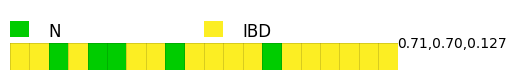

In [49]:
import bone
reload(bone)
ng = [0, 7, 6, 5, 1, 16, 17]
genes, wt1, l1 = bone.getGeneGroups([ng[j] for j in [1, 2, 3]], [-3, -2, -1], 1)

acolor = ["#00CC00", "#FCEE23","#EC008C",
          'cyan', "#F7941D", "#808285",
          'blue', 'black', 'green', 'red']
ana = bone.IBDAnalysis()

ana.getPekow(2)
ana.orderData(l1, wt1)
params = {'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval}
ax = ana.printTitleBar(params)
res = ana.getMetrics2(ana.cval[0], fthr="thr0")
ax.text(len(ana.cval[0]), 4, ",".join(res))
print (res)

## Figure S2

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Peters 2017 IBD (n = 134)
GSE83687 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP7
134 [60, 74] GSE83687 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP7 PLP7
[111, 394, 779]
Arijs 2018 UC (n = 178)
GSE73661 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP10
178 [12, 166] GSE73661 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP10 PLP10
[117, 414, 808]
Wu 2007 IBD (n = 36)
GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12
16 [4, 12] GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12 PLP12
[84, 270, 519]
Vancamelbeke 2017 IBD (n = 194)
GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16
93 [11, 82] GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16 PLP16
[117, 414, 808]
Arijs 2009 IBD IFX RMA (n = 133)
GSE16879 http://hegemon.ucsd.edu/Tools/explore

Text(226, 4, '0.97')

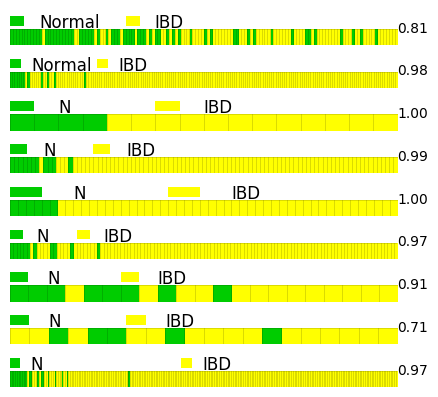

In [51]:
import bone
reload(bone)
genes, wt1, l1 = bone.getGeneGroups(debug=0)
fig = plt.figure(figsize=(5,5), dpi=100)
n1 = 9
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

acolor = ["#00CC00", "yellow","#EC008C",
          'cyan', "#F7941D", "#808285",
          'blue', 'black', 'green', 'red']
ana = bone.IBDAnalysis()
ana.getPetersDf(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[0]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getArijs2018Df(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[1]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getWu2007Df(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 6, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[2]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getVancamelbekeDf(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 20, 'tAnn': 4, 'widthAnn':4, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[3]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getArijs2009Df(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 20, 'tAnn': 4, 'widthAnn':4, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[4]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getVanhoveDf(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 20, 'tAnn': 4, 'widthAnn':4, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[5]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getVanderGotenDf(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 6, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[6]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getPekowDf(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 6, 'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[7]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)

ana.getDenson2018Df(2)
ana.orderDataDf(l1, wt1)
params = {'spaceAnn': 100, 'tAnn': 6, 'widthAnn':6, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[8]}
ax = ana.printTitleBar(params)
res = ana.getMetrics(ana.cval[0])
ax.text(len(ana.cval[0]), 4, res)


In [27]:
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
#db = hu.Database("/Users/sataheri/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/mahdi/public_html/Hegemon/explore.conf")
dbid = "PLP10"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
atype = h.getSurvName("c Response")
hu.uniq(atype)

[9, 'c Response', 'Active UC', 'UC other', 'UC NR', 'UC R', 'Control']

In [32]:
import bone
reload(bone)
ana = bone.IBDAnalysis()
ana.prepareDataDf("PLP94")
atype = ana.getSurvName("c injected with")
hu.uniq(atype)

['7',
 'c injected with',
 'trinitrobenzene sulfonic acid (TNBS)',
 'none (naïve control)']